Hola !

Mi nombre es Oscar Flores y me toca revisar tu proyecto de hoy. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente trabajo! Tu notebook está muy bien trabajado, has demostrado un gran manejo de los contenidos, tu código y conclusiones están muy ordenados. Solamente tengo un comentario acerca de las conclusiones de la sección de tiempo de conversión. Felicitaciones, tu proyecto está aprobado, sigue así!
    
Saludos!
</div>

----

# Análisis de Costos de Marketing

Como parte del equipo de Y.Afisha realizaremos una investigación de como hacer más eficiente los gastos por marketing.

Analizaremos los datos de las transacciones desde enero 2017 a diciembre 2018.

**Librerías**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

<a name="indice"></a>
## Tabla de contenidos


- [2  Importando datos](#id2)
- [3  Explorando datos](#id3)
    - [3.1  Visits](#id3.1)
    - [3.2  Orders](#id3.2)
    - [3.2  Costs](#id3.2)    
- [4  Producto](#id4)
    - [4.1  Usuarios por día, Semana y mes](#id4.1)
    - [4.2  Sesiones por día](#id4.2)
    - [4.3  Duración promedio de las sesiones](#id4.3)
    - [4.4  Sticky Factor - Cada cuanto regresan los usuarios](#id4.4)
    - [4.5  ¿Cuál fuente de tráfico es más efectiva?](#id4.5)
- [5  Ventas](#id5)
    - [5.1  ¿Cuándo comienzan a comprar los usuarios?](#id5.1)
    - [5.2  ¿Cuántos pedidos hacen?](#id5.2)
    - [5.3  ¿Cuánto compran?](#id5.3)
    - [5.4  Lifetime Value](#id5.4)
    - [5.5  Conclusión](#id5.5)
- [6  Marketing](#id6)
    - [6.1  ¿Cuánto dinero se gastó?](#id6.1)
    - [6.2  ¿Costo de adquisición de clientes?](#id6.2)
    - [6.3  Retorno de inversión](#id6.3)
    - [6.4  Conclusión](#id6.4)
- [7  Conclusión General](#id7)

## Importando datos

Tomaremos una muestra para identificar la naturaleza de nuestros datos y así poder importar la data completa de manera correcta que haga más eficiente el consumo de la memoria.

**Muestras de datos**

In [2]:
#Importando muestra con 500 filas de las tablas

visits_500 = pd.read_csv('/datasets/visits_log_us.csv', nrows=500) 
orders_500 = pd.read_csv('/datasets/orders_log_us.csv', nrows=500)
costs_500 = pd.read_csv('/datasets/costs_us.csv', nrows=500)

In [3]:
# Mostrando información general de los datos
visits_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [4]:
# Mostrando primeras 5 filas de la tabla de visitas

visits_500.head()

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [5]:
# Verificando si podemos cambiar la columna de dispostivo a categorías
visits_500.value_counts('Device')

Device
desktop    363
touch      137
dtype: int64

**Conclusión intermedia**

Observando la estructura de la tabla, podemos cambiar el tipo de dato de la columna de dispositivo, las columnas de "End Ts" y "Start Ts" podemos importarlas como datetime y el resto de las columnas se quedaría con su tipo de datos original.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

In [6]:
# Mostrando información general de los datos

orders_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [7]:
# Mostrando primeras 5 filas de la tabla de ordenes

orders_500.head()

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

**Conclusión intermedia**

Podemos importar los datos de la columna "Buy Ts" como datetime.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

In [8]:
# Mostrando información general de los datos

costs_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [9]:
# Mostrando primeras 5 filas de la tabla de costos

costs_500.head()

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

**Conclusión intermedia**

Podemos importar la columna "dt" como datetime.

In [10]:
# Importando datos con tipo de datos correctos.

visits = pd.read_csv('/datasets/visits_log_us.csv',
                    dtype={'Device':'category'},
                    parse_dates=['End Ts', 'Start Ts']) 
orders = pd.read_csv('/datasets/orders_log_us.csv',
                    parse_dates=['Buy Ts'])
costs = pd.read_csv('/datasets/costs_us.csv',
                   parse_dates=['dt'])

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

<a name="id3"></a>
## Explorando datos

Observaremos como están distribuidos nuestros datos y corregiremos donde sea necesario.

[Regresar](#indice)

<a name="id3.1"></a>
### Visits

[Regresar](#indice)

In [11]:
# Mostrando información General de la tabla de visitas

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [12]:
# Mostrando primeras 10 filas de la tabla de visitas

visits.head(10)

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9   1289240080042562063

In [13]:
# Mostrando últimas 10 filas de la tabla de visitas

visits.tail(10)

Device              End Ts  Source Id            Start Ts  \
359390  desktop 2017-12-11 17:54:19          1 2017-12-11 17:54:00   
359391    touch 2017-08-30 11:53:19          2 2017-08-30 11:53:00   
359392  desktop 2017-12-30 21:49:19          4 2017-12-30 21:49:00   
359393  desktop 2017-06-08 07:49:19          4 2017-06-08 07:49:00   
359394    touch 2017-11-06 08:00:19          4 2017-11-06 08:00:00   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         Uid  
359390  18268369011883553090  
359391  18304232853749481866  
359392  18311497973035795342  
359393  18325675073358289850  
359394  18332905065174083046  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559

In [14]:
# Mostrando distribución de los datos

visits.describe()

Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19

In [15]:
# Confirmando si existen duplicados

visits.duplicated().sum()

0

In [16]:
# Cambiando los nombres de la columna a snake_case

visits.rename(columns={
    'Device':'device',
    'Source Id':'source_id',
    'End Ts':'end_ts',
    'Start Ts':'start_ts',
    'Uid':'uid'}, inplace=True)

visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

**Conclusión intermedia**

Hemos cargado de forma correcta los datos y hemos cambiado los nombres de las columnas a snake_case. Procederemos a enriquecer los mismos para el análisis.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien en el análisis inicial de los datos
</div>

In [17]:
# Agregando mes, semana, año y fecha corta de la fecha de inicio de la sesión

visits['visit_week'] = visits['start_ts'].astype('datetime64[W]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits['visit_year'] = visits['start_ts'].dt.year
visits['visit_date'] = visits['start_ts'].dt.date
visits['visit_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

visits[['start_ts', 'end_ts','visit_week','visit_month', 'visit_year', 'visit_date','visit_duration']].head()

start_ts              end_ts visit_week visit_month  visit_year  \
0 2017-12-20 17:20:00 2017-12-20 17:38:00 2017-12-14  2017-12-01        2017   
1 2018-02-19 16:53:00 2018-02-19 17:21:00 2018-02-15  2018-02-01        2018   
2 2017-07-01 01:54:00 2017-07-01 01:54:00 2017-06-29  2017-07-01        2017   
3 2018-05-20 10:59:00 2018-05-20 11:23:00 2018-05-17  2018-05-01        2018   
4 2017-12-27 14:06:00 2017-12-27 14:06:00 2017-12-21  2017-12-01        2017   

   visit_date  visit_duration  
0  2017-12-20            1080  
1  2018-02-19            1680  
2  2017-07-01               0  
3  2018-05-20            1440  
4  2017-12-27               0

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

In [18]:
# Agregando fecha de primer contacto con la plataforma para crear cohortes.

first_visit_date = visits.groupby('uid')['visit_date'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date, on='uid')

In [19]:
# Agregando mes de la primera visita para crear cohortes

visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid visit_week visit_month  visit_year  visit_date  \
0  16879256277535980062 2017-12-14  2017-12-01        2017  2017-12-20   
1    104060357244891740 2018-02-15  2018-02-01        2018  2018-02-19   
2   7459035603376831527 2017-06-29  2017-07-01        2017  2017-07-01   
3  16174680259334210214 2018-05-17  2018-05-01        2018  2018-05-20   
4   9969694820036681168 2017-12-21  2017-12-01        2017  2017-12-27   

   visit_duration first_visit_date first_visit_month  
0            1080       2017-12-20        2017-12-01  
1            1680       2018-02-19        2018-02-01  
2               0       2017-07-01        2017-07-01  
3            1440       2018-03-09        2018-03-01  
4               0       2017-12-27        2017-12-01

**Conclusión intermedia**

Agregamos la fecha de la primera visita para calcular cohortes por mes de visita.

<a name="id3.2"></a>
### Orders

[Regresar](#indice)

In [20]:
# Mostrando información General de la tabla de ordenes

orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [21]:
# Mostrando primeras 10 filas de la tabla de órdenes

orders.head(10)

Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450
5 2017-06-01 08:43:00     0.18  10402394430196413321
6 2017-06-01 08:54:00     1.83  12464626743129688638
7 2017-06-01 09:22:00     1.22   3644482766749211722
8 2017-06-01 09:22:00     3.30  17542070709969841479
9 2017-06-01 09:23:00     0.37   1074355127080856382

In [22]:
# Mostrando últimas 10 filas de la tabla de órdenes

orders.tail(10)

Buy Ts  Revenue                   Uid
50405 2018-05-31 23:36:00     0.61   1551265230644458155
50406 2018-05-31 23:40:00     1.16  13121453305610619664
50407 2018-05-31 23:40:00     2.26  15576344609395725707
50408 2018-05-31 23:42:00     0.92  15854392578508828030
50409 2018-05-31 23:43:00     3.67   1805512004303848280
50410 2018-05-31 23:50:00     4.64  12296626599487328624
50411 2018-05-31 23:50:00     5.80  11369640365507475976
50412 2018-05-31 23:54:00     0.30   1786462140797698849
50413 2018-05-31 23:56:00     3.67   3993697860786194247
50414 2018-06-01 00:02:00     3.42     83872787173869366

In [23]:
# Mostrando distribución de los datos

orders.describe()

Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19

In [24]:
# Confirmando la existencia de duplicados

orders.duplicated().sum()

0

In [25]:
# Cambiando los nombres a snake_case

orders.columns = ['buy_ts', 'revenue', 'uid']
orders.head()

buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

In [26]:
# Agregando mes de la compra
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')


In [27]:
# Agregando fecha de la primera compra

first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

orders.head()

buy_ts  revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

     first_order_date first_order_month  
0 2017-06-01 00:10:00        2017-06-01  
1 2017-06-01 00:25:00        2017-06-01  
2 2017-06-01 00:27:00        2017-06-01  
3 2017-06-01 00:29:00        2017-06-01  
4 2017-06-01 07:58:00        2017-06-01

**Conclusión intermedia**

Agregamos la fecha de la primera orden para calcular cohortes por mes de orden.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

<a name="id3.3"></a>
### Costs

[Regresar](#indice)

In [28]:
# Mostrando información General de la tabla de costos

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [29]:
# Mostrando primeras 10 filas de la tabla de órdenes

costs.head(10)

source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08
5          1 2017-06-06  40.39
6          1 2017-06-07  40.59
7          1 2017-06-08  56.63
8          1 2017-06-09  40.16
9          1 2017-06-10  43.24

In [30]:
# Mostrando últimas 10 filas de la tabla de órdenes

costs.tail(10)

source_id         dt  costs
2532         10 2018-05-22  21.70
2533         10 2018-05-23   7.42
2534         10 2018-05-24  10.79
2535         10 2018-05-25  22.21
2536         10 2018-05-26   7.89
2537         10 2018-05-27   9.92
2538         10 2018-05-28  21.26
2539         10 2018-05-29  11.32
2540         10 2018-05-30  33.15
2541         10 2018-05-31  17.60

In [31]:
# Mostrando distribución de los datos

costs.describe()

source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000

In [32]:
# Confirmando la existencia de duplicados

costs.duplicated().sum()

0

In [33]:
# Agregando mes de los costos

costs['cost_month'] = costs['dt'].astype('datetime64[M]')

costs.head()

source_id         dt  costs cost_month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

<a name="id4"></a>
## Producto

Utilizaremos nuestra tablas de visitas para analizar el conteo de clientes que acceden a la plataforma.

[Regresar](#indice)

<a name="id4.1"></a>
### Usuarios por día, semana y mes

Mostraremos cuantos usuarios activos estamos teniendo en la plataforma por día, semana y mes.

[Regresar](#indice)

In [34]:
# Calculando DAU (Usuarios activos diariamente), WAU(Semanales) y MAU (mensuales)

dau_total = visits.groupby('visit_date').agg({'uid':'nunique'})
wau_total = visits.groupby(['visit_year','visit_week']).agg({'uid':'nunique'})
mau_total = visits.groupby(['visit_year','visit_month']).agg({'uid':'nunique'})

print(f'''Cantidad promedio de usuarios activos por día: {int(dau_total.mean())}
Cantidad promedio de usuarios activos por semana: {int(wau_total.mean())}
Cantidad promedio de usuarios activos por mes: {int(mau_total.mean())}
''')

Cantidad promedio de usuarios activos por día: 907
Cantidad promedio de usuarios activos por semana: 5621
Cantidad promedio de usuarios activos por mes: 23228



In [35]:
# Gráfico de comportamiendo del DAU

px.line(dau_total, title='Daily Active Users')

In [36]:
# Gráfico de comportamiendo del WAU

px.line(wau_total.reset_index()['uid'], title='Weekly Active Users')

In [37]:
# Gráfico de comportamiendo del MAU

px.line(mau_total.reset_index()['uid'], title='Monthly Active Users')

**Conclusión intermedia**

Luego de calcular las métricas DAU, WAU y MAU podemos determinar que en promedio unos 907 usuarios acceden a la plataforma por día, unos 5716 por semana y 23228 por mes.

Adicionalmente, tenemos un pico en los datos para el mes de diciembre.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, todo correcto
</div>

<a name="id4.2"></a>
### Sesiones por día

Determinaremos el comportamiento de los usuarios respecto a la cantidad de sesiones que tienen por día.


[Regresar](#indice)

In [38]:
# Calculando cuantas sesiones por día tienen los usuarios

sessions_per_user = visits.groupby('visit_date').agg({'uid':['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

sessions_per_user['sessions_per_user'].mean()


1.082169644003972

In [39]:
# Grafico lineplot de columna de sessions_per_user

px.line(sessions_per_user['sessions_per_user'], title='Average sessions per day, per user')

**Conclusión intermedia**

En promedio los usuarios están accediendo solo una vez por día. Se refleja un incremento para el mes de diciembre y una caida para el mes de abril.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente, muy bien
</div>

<a name="id4.3"></a>
### Duración promedio de las sesiones

Mostraremos en promedio cuanto tiempo duran los usuarios en la plataforma.

[Regresar](#indice)

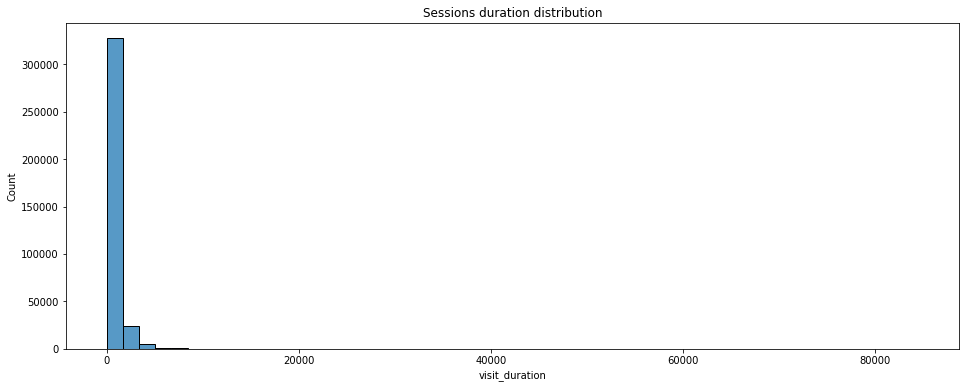

In [40]:
# Observamos si nuestros tiempos de sesión se distribuyen de forma normal

plt.figure(figsize=(16,6))
sns.histplot(data=visits['visit_duration'], bins=50).set(title='Sessions duration distribution')
plt.show()

# px.histogram(visits['visit_duration'], x='duration', title='Avg session duration',
#             nbins=50)

**Conclusión intermedia**

Considerando que nuestra distribución no es normal, usaremos la moda para determinar cuanto tiempo dura en promedio la sesión de los ususarios.

In [41]:
# Mostrando duración promedio de la sesión de la sesión 

avg_session_duration = visits['visit_duration'].mode()

print(f'La duración promedio de cada sesión es de: {int(avg_session_duration)} segundos')

La duración promedio de cada sesión es de: 60 segundos


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Bien!
</div>

<a name="id4.4"></a>
### Sticky Factor - Cada cuanto regresan los usuarios

Calcularemos el ***sticky factor*** semanal y mensual para los usuarios que usan la plataforma.

[Regresar](#indice)

In [42]:
# Calculando porcentaje de usuarios que regresan a usar la plataforma

sticky_wau = dau_total.mean() / wau_total.mean()
sticky_mau = dau_total.mean() / mau_total.mean()

print(f'''El porcentaje de usuarios que regresan cada semana es: {float(sticky_wau):.2%}
El porcentaje de usuarios que regresan cada mes es: {float(sticky_mau):.2%}''')
# sticky_wau

El porcentaje de usuarios que regresan cada semana es: 16.15%
El porcentaje de usuarios que regresan cada mes es: 3.91%


**Conclusión intermedia**

Según los datos que arrojó nuestro cálculo, aproximadamente solo 16% de los usuarios regresa cada semana para usar la plataforma.

De la misma manera, aproximadamente solo el 4% regresa cada mes.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

In [43]:
# Calculando ciclo de vida por usuario

visits['month_cohort_lifetime'] = ((visits['visit_month'] - visits['first_visit_month'])
                            / np.timedelta64(1,'M')).round().astype('int')


visits[['first_visit_month','month_cohort_lifetime']].head()

first_visit_month  month_cohort_lifetime
0        2017-12-01                      0
1        2018-02-01                      0
2        2017-07-01                      0
3        2018-03-01                      2
4        2017-12-01                      0

In [44]:
# Creando cohortes para el cálculo

monthly_cohorts = visits.groupby(['first_visit_month','month_cohort_lifetime'])['uid'].nunique().reset_index()
monthly_initial_users_count = monthly_cohorts[monthly_cohorts['month_cohort_lifetime'] ==  0][['first_visit_month','uid']]
monthly_initial_users_count.rename(columns={
    'uid':'month_cohort_users'
}, inplace=True)

# Uniendo dataframes para mantener el número de usuarios por cohortes

monthly_cohorts = monthly_cohorts.merge(monthly_initial_users_count, on='first_visit_month')

# Calculando tasa de retención
monthly_cohorts['monthly_retention'] = monthly_cohorts['uid'] / monthly_cohorts['month_cohort_users']

monthly_cohorts.head()

first_visit_month  month_cohort_lifetime    uid  month_cohort_users  \
0        2017-06-01                      0  13259               13259   
1        2017-06-01                      1   1043               13259   
2        2017-06-01                      2    713               13259   
3        2017-06-01                      3    814               13259   
4        2017-06-01                      4    909               13259   

   monthly_retention  
0           1.000000  
1           0.078664  
2           0.053775  
3           0.061392  
4           0.068557

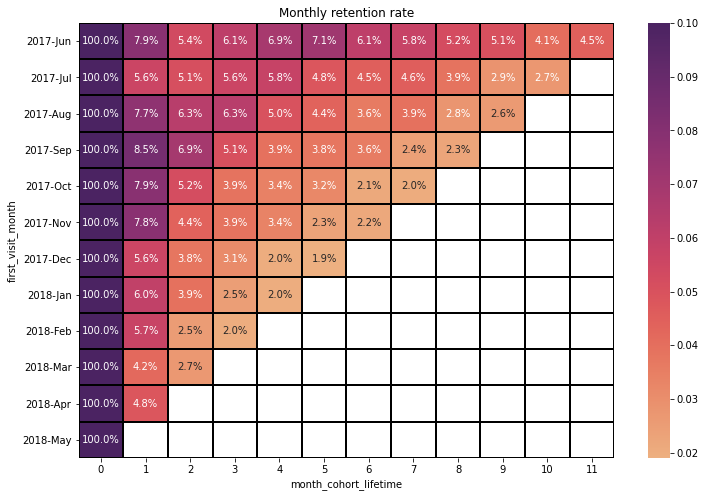

In [45]:
# Mostrando mapa de calor con el comportamiento de la tasa de retención

month_retention_pivot = monthly_cohorts.pivot_table(
    index='first_visit_month', columns='month_cohort_lifetime',
    values='monthly_retention', aggfunc='mean'
)

fig, ax = plt.subplots(1,1, figsize=(12,8))
#plt.figure()
plt.title('Monthly retention rate')
sns.heatmap(data=month_retention_pivot, annot=True, cmap='flare',
           fmt='.1%', linewidths=1, linecolor='black', vmax=0.1, ax=ax)
ax.set_yticklabels(pd.to_datetime(month_retention_pivot.index).strftime('%Y-%b'))
plt.show()

**Conclusión intermedia**

Luego del primer mes del ciclo de vida, menos del 10% de los usuarios regresan.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien! De hecho parece que cae a menos de 5% al tercer mes
</div>

<a name="id4.5"></a>
### ¿Cuál fuente de tráfico es más efectiva?

Mostraremos que fuente de tráfico resulta mas efectiva al momento de recibir visitas.

[Regresar](#indice)

In [46]:
# Agrupando por usuarios y por cuál fuente ingresaron por primera vez

visits_by_sources = visits.sort_values('first_visit_date').groupby('uid')['source_id'].first().reset_index()

In [47]:
# mostramos nuestra tabla de visitas por fuente de tráfico

visits_by_sources

uid  source_id
0             11863502262781          3
1             49537067089222          2
2            297729379853735          3
3            313578113262317          2
4            325320750514679          5
...                      ...        ...
228164  18446403737806311543          5
228165  18446424184725333426          4
228166  18446556406699109058          3
228167  18446621818809592527          4
228168  18446676030785672386          3

[228169 rows x 2 columns]

In [48]:
# Creando gráfico con fuente de tráfico más efectiva

visits_by_sources_pivot = visits_by_sources.pivot_table(
    index='source_id', values='uid', aggfunc='count'
)


px.bar(visits_by_sources_pivot, x=visits_by_sources_pivot.index, y='uid', color='uid',
      color_continuous_scale='sunset', title='Sources first visits count')

<a name="id4.6"></a>
### Conclusión

Una vez calculado nuestras métricas de producto, podemos concluir que a pesar de la cantidad de usuarios se incrementa en el período de tiempo, menos del 10% vuelven a usar la plataforma. 

Por otra parte, el tiempo promedio que duran sus sesiones es de 60 segundos, tendríamos que evaluar si en ese tiempo pueden realizar las operaciones por las que ingresan en la plataforma y que su visita se pueda convertir.

Adicionalmente, se puede destacar que la fuente de tráfico que más atrae clientes es la fuente número 4, seguido de cerca por la fuente número 3.

[Regresar](#indice)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo
</div>

<a name="id5"></a>
## Ventas

Determinaremos el comportamiento de las ventas según la información que tenemos a mano.

[Regresar](#indice)

In [49]:
# Creando DataFrame para calcular cuando comienzan a comprar los usuarios

conversion_visits = (first_order_date
 .reset_index()
 .merge(first_visit_date.reset_index(), on='uid')
)

conversion_visits

uid    first_order_date first_visit_date
0           313578113262317 2018-01-03 21:51:00       2017-09-18
1          1575281904278712 2017-06-03 10:13:00       2017-06-03
2          2429014661409475 2017-10-11 18:33:00       2017-10-11
3          2464366381792757 2018-01-28 15:54:00       2018-01-27
4          2551852515556206 2017-11-24 10:14:00       2017-11-24
...                     ...                 ...              ...
36518  18445147675727495770 2017-11-24 09:03:00       2017-08-20
36519  18445407535914413204 2017-09-22 23:55:00       2017-09-22
36520  18445601152732270159 2018-03-26 22:54:00       2017-08-07
36521  18446156210226471712 2018-02-18 19:34:00       2017-11-07
36522  18446167067214817906 2017-10-17 10:16:00       2017-10-17

[36523 rows x 3 columns]

<a name="id5.1"></a>
### ¿Cuándo comienzan a comprar los usuarios?

En esta sección determinaremos cuanto tiempo transcurre desde el registro hasta la conversión de los usuarios.

[Regresar](#indice)

In [50]:
# Calculamos cuanto tiempo transcurre para la primera compra

conversion_visits['first_order_timespan'] = ((conversion_visits['first_order_date'].dt.date
                                              - conversion_visits['first_visit_date'])
                            / np.timedelta64(1,'D')).round().astype('int')

In [51]:
# Mostramos el tiempo transcurrido para la conversión por cohortes

conversion_visits['first_visit_month'] = conversion_visits['first_visit_date'].astype('datetime64[M]')

first_order_group = (conversion_visits
                     .groupby('first_visit_month')['first_order_timespan']
                     .mean()
                     .round()
                     .astype('int')
                     .reset_index()
                    )
first_order_group

first_visit_month  first_order_timespan
0         2017-06-01                    47
1         2017-07-01                    40
2         2017-08-01                    33
3         2017-09-01                    25
4         2017-10-01                    17
5         2017-11-01                    16
6         2017-12-01                    11
7         2018-01-01                     8
8         2018-02-01                     5
9         2018-03-01                     3
10        2018-04-01                     2
11        2018-05-01                     1

In [52]:
# Promedio de días transcurridos desde el registro hasta la primera compra por días

first_order_group_by_date = (conversion_visits
                     .groupby('first_visit_date')['first_order_timespan']
                     .mean()
                     .round()
                     .astype('int')
                     .reset_index()
                    )
first_order_group_by_date

first_visit_date  first_order_timespan
0         2017-06-01                    48
1         2017-06-02                    57
2         2017-06-03                    56
3         2017-06-04                    54
4         2017-06-05                    51
..               ...                   ...
358       2018-05-27                     0
359       2018-05-28                     0
360       2018-05-29                     0
361       2018-05-30                     0
362       2018-05-31                     0

[363 rows x 2 columns]

In [53]:
px.line(first_order_group_by_date, x='first_visit_date', y='first_order_timespan',
      title='Days passed until first order sorted by days', labels={'first_order_timespan':'days_passed'}
      )

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente! A qué crees que se debe que vaya disminuyendo?
</div>

In [54]:
# Mostramos gráfico de barra con el comportamiento de la primera orden por cohorte mensual

px.bar(first_order_group, x='first_visit_month', y='first_order_timespan',
      color='first_order_timespan', color_continuous_scale='sunset',
      title='Days passed until first order sorted by monthly cohorts', labels={'first_order_timespan':'days_passed'}
      )

**Conclusión intermedia**

Los usuarios de la cohorte de Junio 2017 se tomaron 17 días en promedio para inicializar sus transacciones, esta cantidad de días subió considerablemente para las cohortes de Julio y Agosto, sin embargo, los clientes se toman cada vez menos días para ordernar a partir de septiembre 2017.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Bien con los gráficos
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ojo con la conclusión, la comparación entre estos cohortes no es muy justa. Para los usuarios que entraron en junio 2017, tenemos los datos necesarios para saber si han hecho su transacción hasta may 2018, es decir, los hemos observado por 1 año, pero en los otros grupos, por ejemplo, los de nov 2017, solo hemos tenido 6 meses. Una comparación más justa sería observar solamente a los usuarios por mes de entrada y las compras en sus primeros 3 meses de vida por ejemplo.
</div>

<a name="id5.2"></a>
### ¿Cuántos pedidos hacen?

En esta sección analizaremos el comportamiento de las cohortes al momento de realizar pedidos ¿Cuántos hacen durante su ciclo de vida?

[Regresar](#indice)

In [55]:
# Agregamos ciclo de vida por cohorte mensual en la tabla de ordenes

orders['orders_cohort_lifetime'] = ((orders['order_month'] - orders['first_order_month'])
                                   / np.timedelta64(1,"M")
                                   ).round().astype('int')

orders.head()

buy_ts  revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

     first_order_date first_order_month  orders_cohort_lifetime  
0 2017-06-01 00:10:00        2017-06-01                       0  
1 2017-06-01 00:25:00        2017-06-01                       0  
2 2017-06-01 00:27:00        2017-06-01                       0  
3 2017-06-01 00:29:00        2017-06-01                       0  
4 2017-06-01 07:58:00        2017-06-01                       0

In [56]:
# Creando cohortes para el cálculo

orders_quantity_cohort = orders.groupby(['first_order_month','orders_cohort_lifetime'])['revenue'].count().reset_index()
orders_quantity_cohort.rename(columns={
    'revenue':'orders_count'
}, inplace=True)
orders_quantity_cohort.head()

first_order_month  orders_cohort_lifetime  orders_count
0        2017-06-01                       0          2354
1        2017-06-01                       1           177
2        2017-06-01                       2           174
3        2017-06-01                       3           226
4        2017-06-01                       4           292

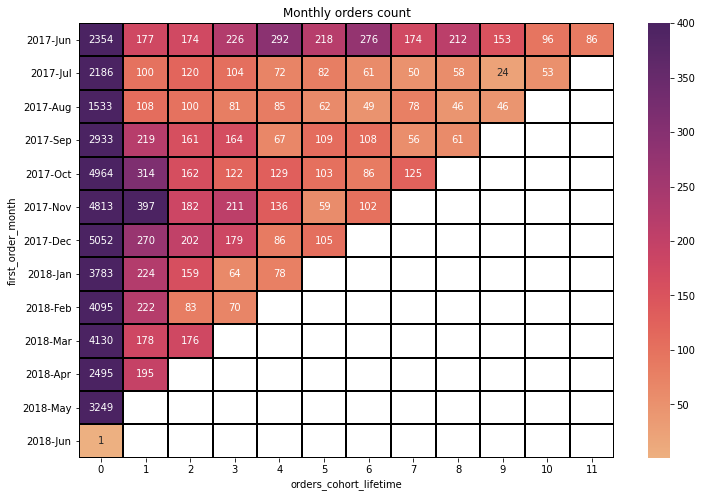

In [57]:
# Mostrando mapa de calor con el comportamiento de pedidos por cohorte mensual

conversion_pivot = orders_quantity_cohort.pivot_table(
    index='first_order_month',
    columns='orders_cohort_lifetime',
    values='orders_count',
    aggfunc='mean'
)

fig, ax = plt.subplots(1,1, figsize=(12,8))
#plt.figure(figsize=(12,8))
plt.title('Monthly orders count')
sns.heatmap(data=conversion_pivot, annot=True, cmap='flare',
           fmt='.0f', linewidths=1, linecolor='black',vmax=400 , ax=ax)
ax.set_yticklabels(pd.to_datetime(conversion_pivot.index).strftime('%Y-%b'))
plt.show()

**Conclusión intermedia**

Podemos observar que el primer mes cuando los usuarios utilizan más la plataforma para hacer pedidos. Al segundo mes sufre una bajada significativa para luego mantenerse estable en el resto del ciclo de vida.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien!
</div>

<a name="id5.3"></a>
### ¿Cuánto compran?

Analizaremos el tamaño promedio de las compras de las cohortes.

[Regresar](#indice)

In [58]:
# Creando cohortes para el cálculo

orders_revenue_cohort = orders.groupby(['first_order_month','orders_cohort_lifetime'])['revenue'].sum().reset_index()
orders_revenue_cohort.rename(columns={
    'revenue':'total_revenue'
}, inplace=True)
orders_revenue_cohort.head()

first_order_month  orders_cohort_lifetime  total_revenue
0        2017-06-01                       0        9557.49
1        2017-06-01                       1         981.82
2        2017-06-01                       2         885.34
3        2017-06-01                       3        1931.30
4        2017-06-01                       4        2068.58

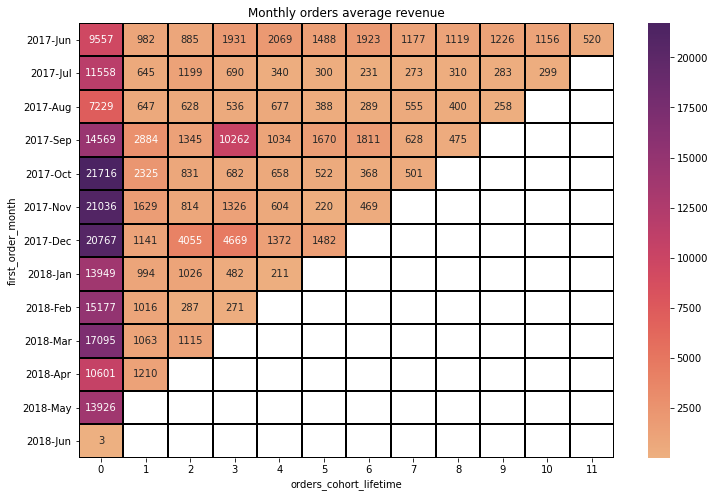

In [59]:
# Mostrando mapa de calor con el comportamiento de pedidos por cohorte mensual

revenue_pivot = orders_revenue_cohort.pivot_table(
    index='first_order_month',
    columns='orders_cohort_lifetime',
    values='total_revenue',
    aggfunc='mean'
)

fig, ax = plt.subplots(1,1, figsize=(12,8))
#plt.figure(figsize=(12,8))
plt.title('Monthly orders average revenue')
sns.heatmap(data=revenue_pivot, annot=True, cmap='flare',
           fmt='.0f', linewidths=1, linecolor='black',vmax=None, ax=ax)
ax.set_yticklabels(pd.to_datetime(revenue_pivot.index).strftime('%Y-%b'))
plt.show()

**Conclusión intermedia**

Tomando en consideración que en nuestro mapa de calor de cantidad de pedidos el primer mes supera ampliamente al resto de los meses del ciclo de vida, tenemos que los mayores ingresos provienen también de este primer mes del ciclo.

Sin embargo, es importante destacar la cohorte del mes de septiembre 2017 quien tiene un pico importante en ingresos para su 4to mes de ciclo de vida.

En la próxima sección mostraremos cuanto compra en promedio cada usuario.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

In [60]:
# Creando cohortes de usuario por primera compra realizada

orders_cohorts_sizes = orders.groupby('first_order_month').agg({'uid':['nunique','count']}).reset_index()
orders_cohorts_sizes.columns = ['first_order_month','n_buyers','n_orders']

orders_cohorts_sizes.head()

first_order_month  n_buyers  n_orders
0        2017-06-01      2023      4438
1        2017-07-01      1923      2910
2        2017-08-01      1370      2188
3        2017-09-01      2581      3878
4        2017-10-01      4340      6005

In [61]:
# Utilizamos nuestra nueva tabla para agrupar por ingresos totales por cohorte y mes de ciclo de vida

orders_cohorts = (orders
                  .groupby(['first_order_month', 'order_month'])['revenue']
                  .sum()
                  .reset_index()
                 )

# Unimos nuestras cohortes con nuestra tabla de tamaño de cohorte

orders_report = orders_cohorts.merge(orders_cohorts_sizes, on='first_order_month')

orders_report.head()

first_order_month order_month  revenue  n_buyers  n_orders
0        2017-06-01  2017-06-01  9557.49      2023      4438
1        2017-06-01  2017-07-01   981.82      2023      4438
2        2017-06-01  2017-08-01   885.34      2023      4438
3        2017-06-01  2017-09-01  1931.30      2023      4438
4        2017-06-01  2017-10-01  2068.58      2023      4438

In [62]:
# Calculamos cantidad de pedidos e ingresos por usuario por cohorte

orders_report['avg_orders_by_users'] = orders_report['n_orders'] / orders_report['n_buyers']

orders_report['avg_revenue_by_users'] = orders_report['revenue'] / orders_report['n_buyers']

orders_report.head()

first_order_month order_month  revenue  n_buyers  n_orders  \
0        2017-06-01  2017-06-01  9557.49      2023      4438   
1        2017-06-01  2017-07-01   981.82      2023      4438   
2        2017-06-01  2017-08-01   885.34      2023      4438   
3        2017-06-01  2017-09-01  1931.30      2023      4438   
4        2017-06-01  2017-10-01  2068.58      2023      4438   

   avg_orders_by_users  avg_revenue_by_users  
0             2.193772              4.724414  
1             2.193772              0.485329  
2             2.193772              0.437637  
3             2.193772              0.954671  
4             2.193772              1.022531

In [63]:
# Calculando meses del ciclo de vida de la cohorte

orders_report['age'] = ((orders_report['order_month'] - orders_report['first_order_month'])
                       / np.timedelta64(1,'M')).round().astype('int')

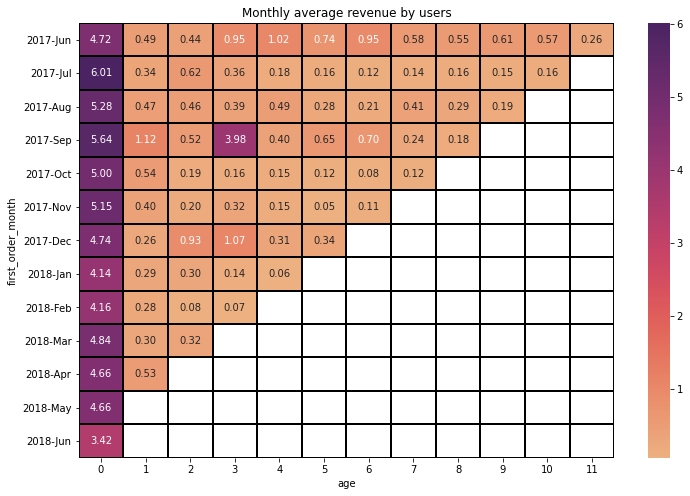

In [64]:
revenue_by_user_pivot = orders_report.pivot_table(
    index='first_order_month',
    columns='age',
    values='avg_revenue_by_users',
    aggfunc='mean'
)

fig, ax = plt.subplots(1,1, figsize=(12,8))
#plt.figure(figsize=(12,8))
plt.title('Monthly average revenue by users')
sns.heatmap(data=revenue_by_user_pivot, annot=True, cmap='flare',
           fmt='.2f', linewidths=1, linecolor='black',vmax=None, ax=ax)
ax.set_yticklabels(pd.to_datetime(revenue_by_user_pivot.index).strftime('%Y-%b'))
plt.show()

**Conclusión intermedia**

Los usuarios están realizando más compras para su primer mes de ciclo de vida, sin embargo, luego se estabilizan. Importante destacar que las cohortes de septiembre 2017 y diciembre 2017 en promedio gastan más que el resto.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, con esto se puede calcular el lifetime value
</div>

<a name="id5.4"></a>
### Lifetime Value

Analizaremos cuanto dinero están trayendo a la empresa los clientes durante su ciclo de vida.

[Regresar](#indice)

In [65]:
# calculando lifetime value

orders_report['ltv'] = orders_report['revenue'] / orders_report['n_buyers']

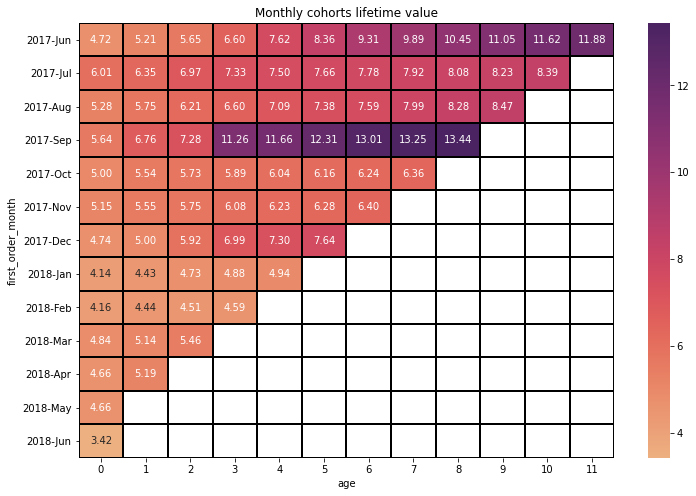

In [66]:
# Mostrando heatmap con el lifetime value de las cohortes

orders_report_pivot = orders_report.pivot_table(
    index='first_order_month', columns='age',
    values='ltv', aggfunc='sum'
).cumsum(axis=1)

fig, ax = plt.subplots(1,1, figsize=(12,8))
# plt.figure(figsize=(12,8))
plt.title('Monthly cohorts lifetime value')
sns.heatmap(data=orders_report_pivot, annot=True, cmap='flare',
           fmt='.2f', linewidths=1, linecolor='black')
ax.set_yticklabels(pd.to_datetime(orders_report_pivot.index).strftime('%Y-%b'))
plt.show()

**Conclusión intermedia**

De acuerdo al mapa de calor del lifetime value general, detectamos que las cohortes que mejor ingreso tienen son las de Junio 2017 y septiembre 2017, seguidas por las cohortes de julio y agosto 2017.

A continuación realizaremos el cálculo para detectar el lifetime value por fuente de tráfico.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente
</div>

In [67]:
# Creamos tabla agrupando los usuarios únicos con su respectiva fuente de visita y 
# calculamos los ingresos totales por usuario, por mes

orders_by_sources = (visits_by_sources
                     .merge(conversion_visits, on='uid')
                     .merge(orders.groupby(['uid','order_month'])['revenue']
                            .sum().reset_index(),
                            on='uid')
                    )
orders_by_sources.head()

uid  source_id    first_order_date first_visit_date  \
0   313578113262317          2 2018-01-03 21:51:00       2017-09-18   
1  1575281904278712         10 2017-06-03 10:13:00       2017-06-03   
2  2429014661409475          3 2017-10-11 18:33:00       2017-10-11   
3  2464366381792757          5 2018-01-28 15:54:00       2018-01-27   
4  2551852515556206          5 2017-11-24 10:14:00       2017-11-24   

   first_order_timespan first_visit_month order_month  revenue  
0                   107        2017-09-01  2018-01-01     0.55  
1                     0        2017-06-01  2017-06-01     3.05  
2                     0        2017-10-01  2017-10-01    73.33  
3                     1        2018-01-01  2018-01-01     2.44  
4                     0        2017-11-01  2017-11-01    10.99

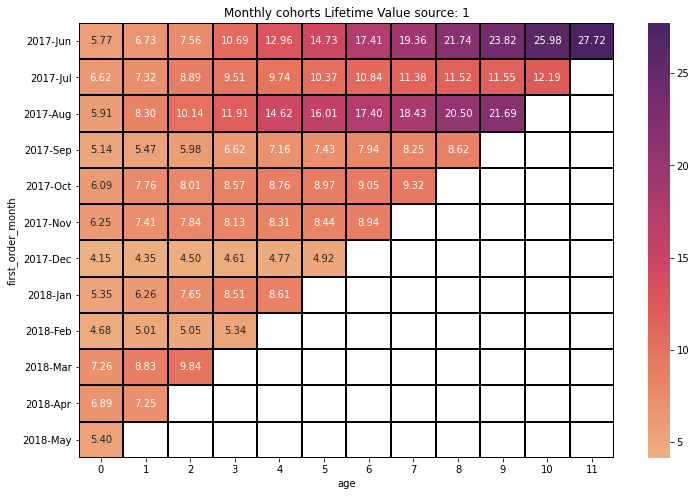

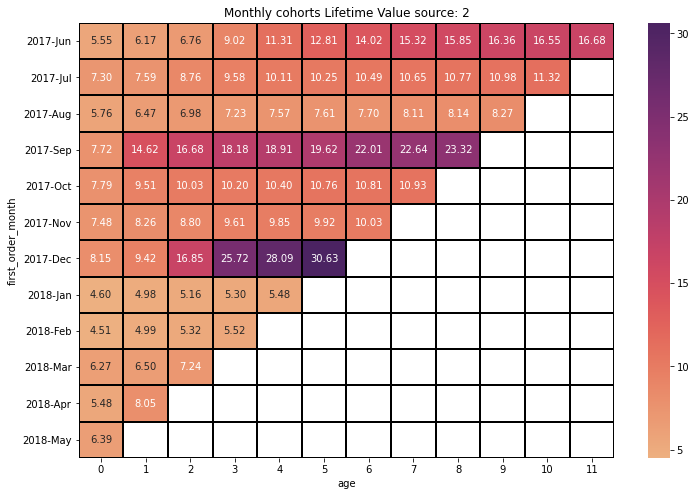

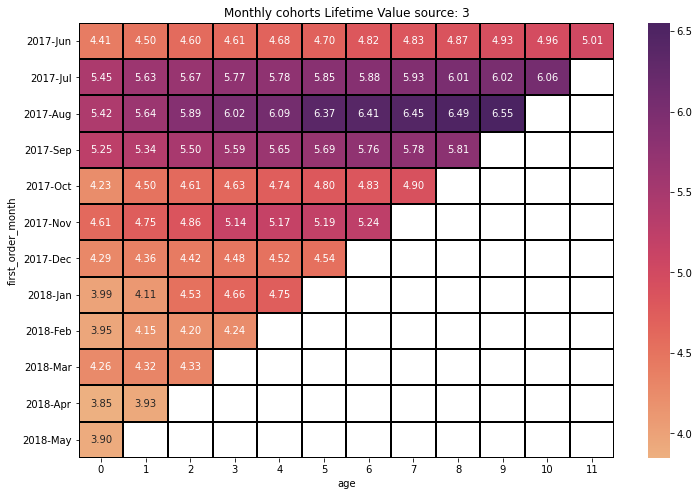

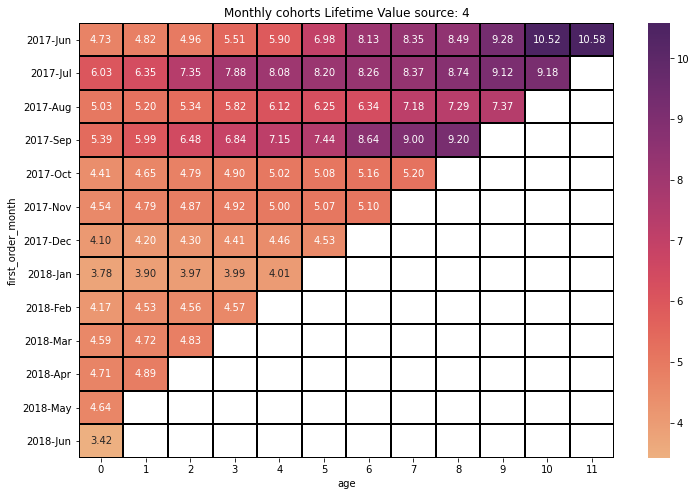

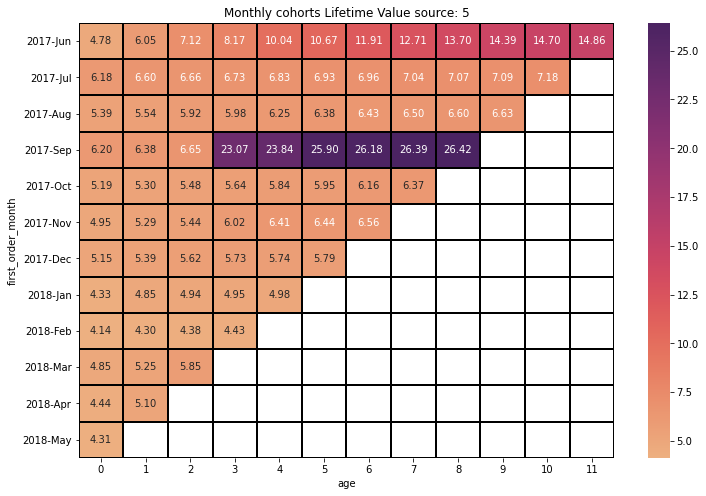

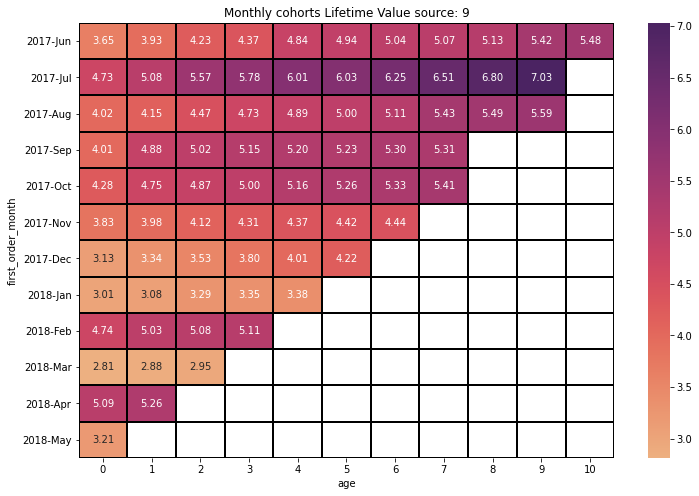

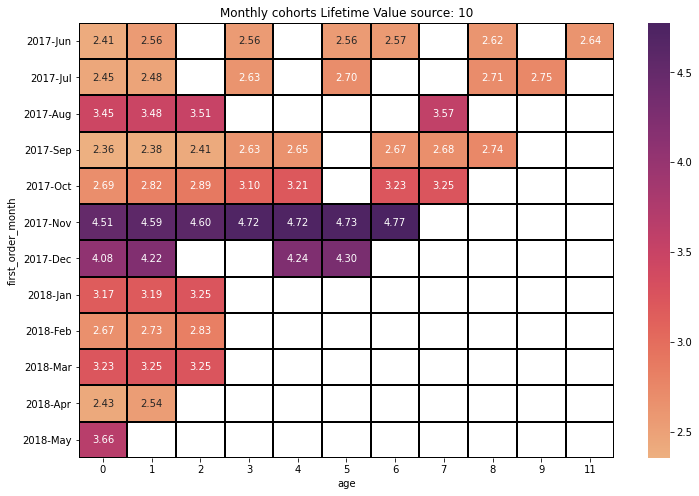

In [68]:
# Creamos bucle para calcular los el Romi por fuente de tráfico

for source in sorted(orders_by_sources['source_id'].unique()):
    
    # Obviamos la fuente de tráfico 7 ya que tiene solo 1 registro.
    if source != 7:
        # Filtramos el data frame por cada una de las fuentes disponibles
        df = orders_by_sources[orders_by_sources['source_id'] == source]
        
        # Agrupamos por primera fecha de orden por usuario
        cohorts = df.groupby('uid')['order_month'].min().astype('datetime64[M]').reset_index()
        cohorts.columns = ['uid', 'first_order_month']
        
        # Unimos la tabla filtrada con la agrupación con fecha mínima
        df = df.merge(cohorts, on='uid')
        
        # Agrupamos por cantidad de usuarios únicos por cohorte
        cohorts_sizes = df.groupby('first_order_month')['uid'].nunique().reset_index()
        cohorts_sizes.columns = ['first_order_month', 'n_buyers']
        
        # Agrupamos por suma total de ingresos por cohorte y por mes
        revenue = df.groupby(['first_order_month', 'order_month'])['revenue'].sum().reset_index()
        revenue.columns = ['first_order_month', 'order_month', 'gp']
        
        # Unimos el tamaño de las cohortes con los ingresos totales 
        report = cohorts_sizes.merge(revenue, on='first_order_month')
        
        # Calculamos la antigüedad de la cohorte
        report['age'] = ((report['order_month'] - report['first_order_month'])
                    / np.timedelta64(1,"M")
                    ).round(0).astype('int')
        
        # Calculando lifetime Value
        report['ltv'] = report['gp'] / report['n_buyers']
        
        # Creamos pivot para graficar
        ltv_report_pivot = report.pivot_table(
            index= 'first_order_month', columns='age',
            values='ltv', aggfunc='mean'
        ).cumsum(axis=1)

        fig, ax = plt.subplots(1,1, figsize=(12,8))
        plt.title(f'Monthly cohorts Lifetime Value source: {source}')
        sns.heatmap(data=ltv_report_pivot, annot=True, cmap='flare',
                   fmt='.2f', linewidths=1, linecolor='black')
        ax.set_yticklabels(pd.to_datetime(ltv_report_pivot.index).strftime('%Y-%b'))
        plt.show()

<a name="id5.5"></a>
### Conclusión

Cuando calculamos el lifetime value por fuente de tráfico, podemos observar que las fuentes 1, 2 y 5 se son las que más dinero traen.

[Regresar](#indice)

<a name="id6"></a>
## Marketing

Observaremos a detalle cuanto nos cuesta adquirir un cliente y que fuente de tráfico es más efectiva.

[Regresar](#indice)

<a name="id6.1"></a>
### ¿Cuánto dinero se gastó?

Mostraremos cuanto dinero se gastó por fuente de tráfico, a lo largo del tiempo y el total gastado.

[Regresar](#indice)

In [69]:
# Imprimiendo cantidad total gastada por marketing

print(f'Monto total gastado:',costs['costs'].sum())

Monto total gastado: 329131.62


In [70]:
# Calculando costos totales por mes

costs_by_month = costs.groupby('cost_month')['costs'].sum().reset_index()

In [71]:
# Mostrando lineplot con comportamiento de costos por mes

px.line(costs_by_month, x='cost_month', y='costs',
        title='Marketing costs by months', markers=True)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien!
</div>

In [72]:
# Calculando costos totales por fuente de tráfico

costs_by_source = costs.groupby(['cost_month','source_id'])['costs'].sum().reset_index().sort_values('costs', ascending=False)

costs_by_source

cost_month  source_id     costs
37 2017-11-01          3  17025.34
44 2017-12-01          3  16219.52
30 2017-10-01          3  15737.24
51 2018-01-01          3  14808.78
58 2018-02-01          3  14228.56
..        ...        ...       ...
6  2017-06-01         10    314.22
12 2017-07-01          9    302.54
5  2017-06-01          9    285.22
19 2017-08-01          9    248.93
20 2017-08-01         10    232.57

[84 rows x 3 columns]

In [73]:
# Mostrando areaplot con comportamiento de costos por mes

px.area(costs_by_source, x='cost_month', y='costs', color='source_id',
        title='Marketing costs by sources', markers=True, color_discrete_sequence=px.colors.qualitative.Bold)

**Conclusión intermedia**

Observamos que los gastos de marketing iniciaron en 18 mil dólares, para luego bajar a unos 15 mil y luego llegar a su pico en los meses de noviembre y diciembre, se evidencia que durante estos meses fue donde más se invirtió para atraer más clientes.

Por otra parte, tenemos que la fuente en la que más se invertió en publicidad fue en la número 3, y la fuente en la que menos se invirtió terminó siendo la fuente número 9.

Sin embargo, con la información que tenemos, no podemos concluir si estas inversiones fueron beneficiosas para la empresa o no.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

<a name="id6.2"></a>
### Costo de adquisición de clientes

Analizaremos cuando nos costó adquirir clientes por fuente de tráfico.

[Regresar](#indice)

In [74]:
# Uniendo a la tabla de costos totales por mes con la tabla de tamaño de cohortes

costs_report = costs_by_month.merge(orders_cohorts_sizes, left_on='cost_month', right_on='first_order_month' )

costs_report.head()

cost_month     costs first_order_month  n_buyers  n_orders
0 2017-06-01  18015.00        2017-06-01      2023      4438
1 2017-07-01  18240.59        2017-07-01      1923      2910
2 2017-08-01  14790.54        2017-08-01      1370      2188
3 2017-09-01  24368.91        2017-09-01      2581      3878
4 2017-10-01  36322.88        2017-10-01      4340      6005

In [75]:
# Calculando costo de adquisición de clientes

costs_report['cac'] = costs_report['costs'] / costs_report['n_buyers']

costs_report.head()

cost_month     costs first_order_month  n_buyers  n_orders        cac
0 2017-06-01  18015.00        2017-06-01      2023      4438   8.905091
1 2017-07-01  18240.59        2017-07-01      1923      2910   9.485486
2 2017-08-01  14790.54        2017-08-01      1370      2188  10.796015
3 2017-09-01  24368.91        2017-09-01      2581      3878   9.441654
4 2017-10-01  36322.88        2017-10-01      4340      6005   8.369327

In [76]:
# Mostrando gráfico de línea con comportamiento del costo de adquisición de clientes general

px.line(costs_report, x='cost_month', y='cac',
        title='General client adquisition cost', markers=True)

**Conclusión intermedia**

Se puede observar que el costo para adquirir nuevos clientes llegó a su pico en el tercer mes del ciclo de vida, para luego reducirse su segundo punto más bajo siendo de un 8.36 dólares por cliente. El punto más bajo fue en mayo 2018 donde adquirir un nuevo clientes nos costaba 7.43 dólares.

Ahora calcularemos el costo de adquisición de clientes por fuente de tráfico.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

In [77]:
# Creamos bucle para calcular los el Romi por fuente de tráfico
fig = px.line(markers=True)
for source in sorted(orders_by_sources['source_id'].unique()):
    
    # Obviamos la fuente de tráfico 7 ya que tiene solo 1 registro.
    if source != 7:
        # Filtramos el data frame por cada una de las fuentes disponibles
        df = orders_by_sources[orders_by_sources['source_id'] == source]
        
        # Agrupamos por primera fecha de orden por usuario
        cohorts = df.groupby('uid')['order_month'].min().astype('datetime64[M]').reset_index()
        cohorts.columns = ['uid', 'first_order_month']
        
        # Unimos la tabla filtrada con la agrupación con fecha mínima
        df = df.merge(cohorts, on='uid')
        
        # Agrupamos por cantidad de usuarios únicos por cohorte
        cohorts_sizes = df.groupby('first_order_month')['uid'].nunique().reset_index()
        cohorts_sizes.columns = ['first_order_month', 'n_buyers']
        
        # Agrupamos por suma total de ingresos por cohorte y por mes
        revenue = df.groupby(['first_order_month', 'order_month'])['revenue'].sum().reset_index()
        revenue.columns = ['first_order_month', 'order_month', 'gp']
        
        # Unimos el tamaño de las cohortes con los ingresos totales 
        report = cohorts_sizes.merge(revenue, on='first_order_month')
        
        # Calculamos la antigüedad de la cohorte
        report['age'] = ((report['order_month'] - report['first_order_month'])
                    / np.timedelta64(1,"M")
                    ).round(0).astype('int')
        
        # Calculando lifetime Value
        report['ltv'] = report['gp'] / report['n_buyers']
        
        # Filtramos la tabla de costos por la fuente en la que estamos iterando
        cost_by_sources = costs[costs['source_id'] == source]
        
        # Agrupamos los costos totales por mes de costo
        costs_total = cost_by_sources.groupby('cost_month')['costs'].sum().reset_index()
        costs_total.columns = ['cost_month','total_costs']
        
        # Unimos la tabla de costos totales con la tabla con información para los cálculos por cohortes
        report = report.merge(costs_total, left_on='first_order_month', right_on='cost_month')
        
        # Calculamos costo de adquisición de clientes
        report['cac'] = report['total_costs'] / report['n_buyers']

        fig.add_scatter(x=report['cost_month'],y=report['cac'], name=f'Source {source}')
        
fig.update_layout(title='Client adquisition Cost by sources',
                  yaxis={'title':'cac'},
                  colorway=px.colors.qualitative.Bold)
fig.show()

**Conclusión intermedia**

Respecto a las fuentes de tráfico, la fuente donde más nos costó para adquirir clientes fue en la número 3 y en las que menos nos costó fueron en las 9 y 10.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien. Esto se podría haber calculado de manera más precisa uniendo el costo diario por fuente con los usuarios nuevos diarios por fuente. Luego con la media o mediana se tenía una medida mensual.
</div>

<a name="id6.3"></a>
### Retorno de inversión (ROMI)

Demostraremos cuanto nos tardamos en recuperar la inversión en mercadeo.

[Regresar](#indice)

In [78]:
# Agregamos a la tabla de reporte de costos los campos del lifetime value y edad de la cohorte

costs_report = costs_report.merge(orders_report[['first_order_month','ltv','age']], on='first_order_month')

costs_report

cost_month     costs first_order_month  n_buyers  n_orders       cac  \
0  2017-06-01  18015.00        2017-06-01      2023      4438  8.905091   
1  2017-06-01  18015.00        2017-06-01      2023      4438  8.905091   
2  2017-06-01  18015.00        2017-06-01      2023      4438  8.905091   
3  2017-06-01  18015.00        2017-06-01      2023      4438  8.905091   
4  2017-06-01  18015.00        2017-06-01      2023      4438  8.905091   
..        ...       ...               ...       ...       ...       ...   
73 2018-03-01  30415.27        2018-03-01      3533      4484  8.608907   
74 2018-03-01  30415.27        2018-03-01      3533      4484  8.608907   
75 2018-04-01  22289.38        2018-04-01      2276      2690  9.793225   
76 2018-04-01  22289.38        2018-04-01      2276      2690  9.793225   
77 2018-05-01  22224.27        2018-05-01      2988      3249  7.437841   

         ltv  age  
0   4.724414    0  
1   0.485329    1  
2   0.437637    2  
3   0.954671    3  
4   1.022531    4  
..       ...  ...  
73  0.300892    1  
74  0.315559    2  
75  4.657597    0  
76  0.531599    1  
77  4.660562    0  

[78 rows x 8 columns]

In [79]:
# Calculando el retorno de la inversión General

costs_report['romi'] = costs_report['ltv'] / costs_report['cac']

costs_report.head()

cost_month    costs first_order_month  n_buyers  n_orders       cac  \
0 2017-06-01  18015.0        2017-06-01      2023      4438  8.905091   
1 2017-06-01  18015.0        2017-06-01      2023      4438  8.905091   
2 2017-06-01  18015.0        2017-06-01      2023      4438  8.905091   
3 2017-06-01  18015.0        2017-06-01      2023      4438  8.905091   
4 2017-06-01  18015.0        2017-06-01      2023      4438  8.905091   

        ltv  age      romi  
0  4.724414    0  0.530530  
1  0.485329    1  0.054500  
2  0.437637    2  0.049145  
3  0.954671    3  0.107205  
4  1.022531    4  0.114825

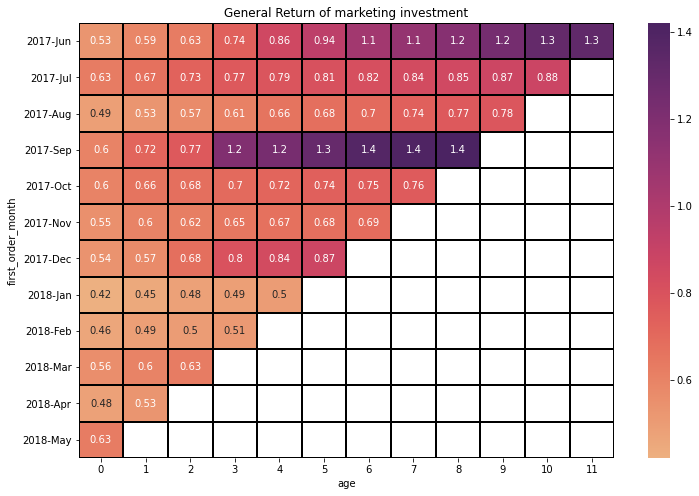

In [83]:
# Mostrando heatmap con el romi value de las cohortes general

romi_pivot = costs_report.pivot_table(
    index='first_order_month', columns='age',
    values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

fig, ax = plt.subplots(1,1, figsize=(12,8))
plt.title('General Return of marketing investment')
sns.heatmap(data=romi_pivot, annot=True, cmap='flare',
           linewidths=1, linecolor='black')
ax.set_yticklabels(pd.to_datetime(romi_pivot.index).strftime('%Y-%b'))
plt.show()

**Conclusión intermedia**

Pdemos observar que el retorno de las inversiones no se suele completar en el el transcurso de ciclo de vida estudiado, solo dos cohortes lograron entrar el retorno de la inversión inicial, la cohorte de junio 2017 al cabo de 7 meses de vida y la cohorte de septiembre 2017 al cabo del cuarto mes de ciclo de vida.

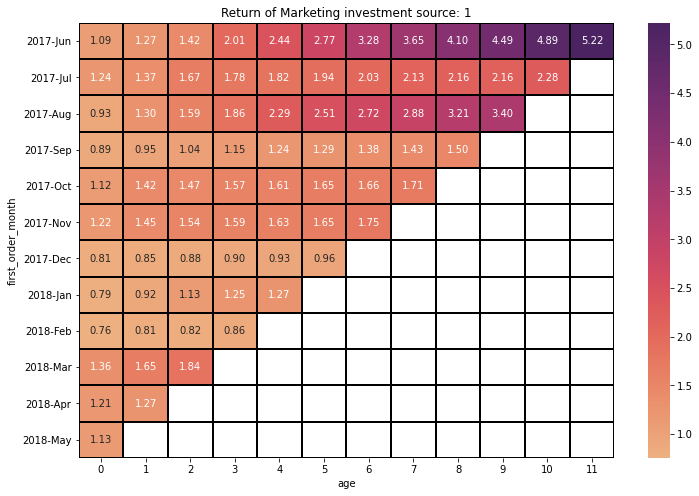

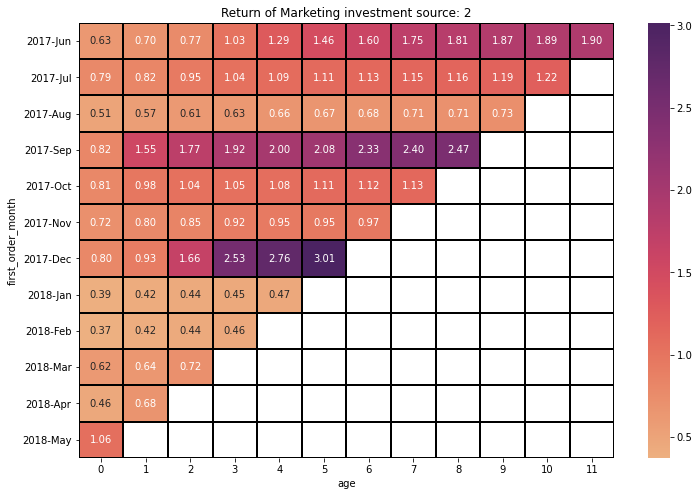

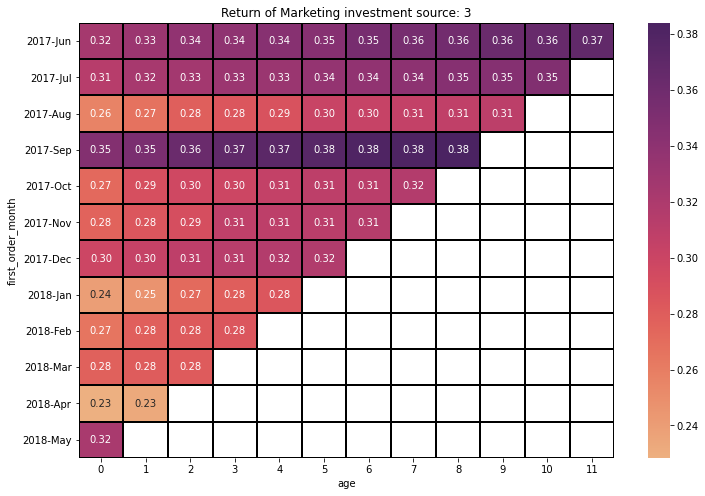

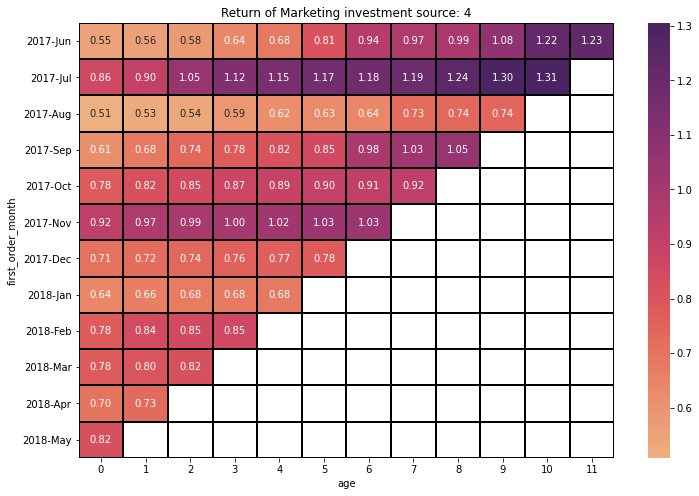

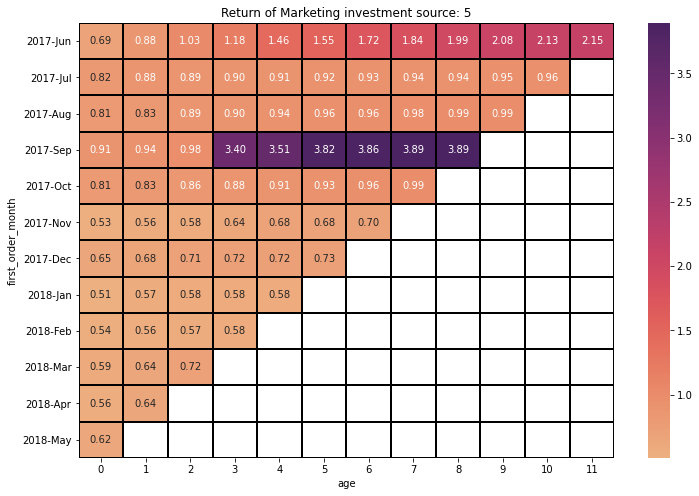

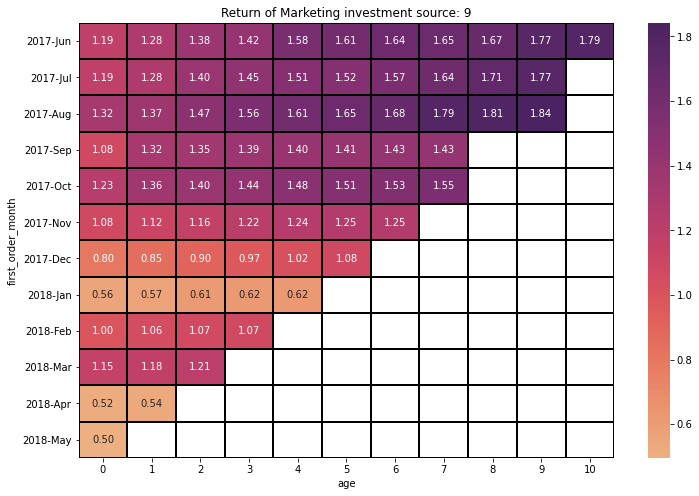

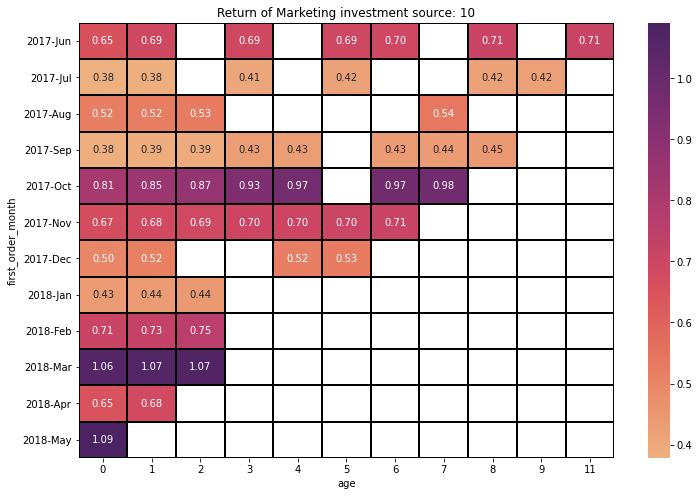

In [82]:
# Creamos bucle para calcular los el Romi por fuente de tráfico

for source in sorted(orders_by_sources['source_id'].unique()):
    
    # Obviamos la fuente de tráfico 7 ya que tiene solo 1 registro.
    if source != 7:
        # Filtramos el data frame por cada una de las fuentes disponibles
        df = orders_by_sources[orders_by_sources['source_id'] == source]
        
        # Agrupamos por primera fecha de orden por usuario
        cohorts = df.groupby('uid')['order_month'].min().astype('datetime64[M]').reset_index()
        cohorts.columns = ['uid', 'first_order_month']
        
        # Unimos la tabla filtrada con la agrupación con fecha mínima
        df = df.merge(cohorts, on='uid')
        
        # Agrupamos por cantidad de usuarios únicos por cohorte
        cohorts_sizes = df.groupby('first_order_month')['uid'].nunique().reset_index()
        cohorts_sizes.columns = ['first_order_month', 'n_buyers']
        
        # Agrupamos por suma total de ingresos por cohorte y por mes
        revenue = df.groupby(['first_order_month', 'order_month'])['revenue'].sum().reset_index()
        revenue.columns = ['first_order_month', 'order_month', 'gp']
        
        # Unimos el tamaño de las cohortes con los ingresos totales 
        report = cohorts_sizes.merge(revenue, on='first_order_month')
        
        # Calculamos la antigüedad de la cohorte
        report['age'] = ((report['order_month'] - report['first_order_month'])
                    / np.timedelta64(1,"M")
                    ).round(0).astype('int')
        
        # Calculando lifetime Value
        report['ltv'] = report['gp'] / report['n_buyers']
        
        # Filtramos la tabla de costos por la fuente en la que estamos iterando
        cost_by_sources = costs[costs['source_id'] == source]
        
        # Agrupamos los costos totales por mes de costo
        costs_total = cost_by_sources.groupby('cost_month')['costs'].sum().reset_index()
        costs_total.columns = ['cost_month','total_costs']
        
        # Unimos la tabla de costos totales con la tabla con información para los cálculos por cohortes
        report = report.merge(costs_total, left_on='first_order_month', right_on='cost_month')
        
        # Calculamos costo de adquisición de clientes
        report['cac'] = report['total_costs'] / report['n_buyers']
        
        # Calculamos Romi
        report['romi'] = report['ltv'] / report['cac']
        
        # Creamos pivot para graficar
        report_pivot = report.pivot_table(
            index= 'first_order_month', columns='age',
            values='romi', aggfunc='mean'
        ).cumsum(axis=1)

        fig, ax = plt.subplots(1,1, figsize=(12,8))
        plt.title(f'Return of Marketing investment source: {source}')
        sns.heatmap(data=report_pivot, annot=True, cmap='flare',
                   fmt='.2f', linewidths=1, linecolor='black')
        ax.set_yticklabels(pd.to_datetime(report_pivot.index).strftime('%Y-%b'))
        plt.show()

<a name="id6.4"></a>
### Conclusión

Luego de calcular el retorno de inversión por fuente de tráfico, tenemos que la fuente mas rentable es la fuente número 1 (con hasta 5 veces de retorno de inversión) donde varias cohortes destacan por ver su inversión retornada apenas en su primer mes de ciclo de vida. Tampoco se pueden dejar de lado las fuentes 2 y 5 quienes ven hasta triplicado el retorno de la inversión.

Es importante destacar que si vamos a enfocarnos en invertir más para hacer crecer el negocio, el enfoque debe realizarse en las fuentes antes mencionadas.

[Regresar](#indice)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien! Mismo comentario que para el CAC, se podría haber hecho un cálculo diario y luego mirar la media.
</div>

<a name="id7"></a>
## Conclusión General

Iniciamos importando solo una parte de los datos para verificar la naturaleza de los mismos y de esa manera importar los datos completos de forma correcta para hacer más eficiente el uso de memoria.

Luego de la importación exploramos los datos en busca de inconsistencias y duplicados. Enriquecimos para poder hacer el posterior análisis.

Cuando hablamos de producto, la tendencia es clara, normalmente los usuario no regresan luego de su primer contacto, nos encontramos con menos de un 10% de tasa de retención, lo que indica que debemos formar una estrategia para hacer que estos usuarios regresen y aumentar la posibilidad de órdenes. Por otra parte, las sesiones llegan normalmente a 60 segundos, se debería evaluar si en este tiempo es posible hacer uso de la plataforma y realizar sus respectivas órdenes.

En el análisis por fuente de tráfico, encontramos que las fuentes 4, 3 y 5 son las que captan al usuario por primera vez con más frecuencia.

Los usuarios tardaron aproximadamente unos 40 días en el 3er trimestre del año 2017 en convertir sus órdenes, sin embargo, esta tendencia se fue reduciendo mes a mes, hasta llegar a un mínimo de 3 a 0 días en convertir, esto para el último trimestre evaluado (abril - junio 2018).

Respecto al valor en su ciclo de vida, tenemos 2 cohortes, las de junio y septiembre 2017, que requieren ser evaluadas de cerca para determinar que estrategia de marketing se realizó donde los clientes pertenecientes a dichas cohortes aportaron de mayor manera en su valor por ciclo de vida. También es importante destacar, que segmentando por fuente de tráfico, nos encontramos que las que más aportaron fueron las fuentes 1, 2 y 5.

En el costo de adquisición de cliente tenemos un aumento importante en el primer trimestre evaluado (junio - septiembre 2017), sin embargo, estos costos fueron cayendo a lo largo del ciclo de vida evaluado, no obstante, sus ingresos se mantuvieron con la misma tendencia.

Para finalizar, el retorno de la inversión realizada se puede ver concretada durante los primeros 6 meses del ciclo de vida para las cohortes de junio y septiembre 2017, sin embargo, el resto de las cohortes no ve el valor de su inversión retornada al momento de realizar el análisis. Segmentando el retorno de inversión por fuentes, tenemos que las fuentes más rentables terminan siendo la 1, 2, 5 y 9 respectivamente.


[Regresar](#indice)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente, muy buenas conclusiones. Solamente comentaría que el tiempo de conversión se ve influenciado por el tiempo de vida de los usuarios, es decir, por la cohorte.
</div>